In [8]:
# pretty boxplot
# install.packages('ggthemes')
library(ggthemes)
library(ggplot2)

In [2]:
# load('/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy2/data/Cleaned_Data/cbMen.rda')
load('C:/Users/casey/Dropbox/SMU_DataScience/MSDS_7333_QuantifyingTheWorld/QTW_CaseStudies/CaseStudy2/data/Cleaned_Data/cbMen.rda')

# Question 10

# Box Plots

In [3]:
# Lets make box plots of age across all 14 years of the race
head(cbMen)

,year,sex,name,home,age,runTime
1999.1,1999,M,Worku Bikila,Ethiopia,28,46.98333
1999.2,1999,M,Lazarus Nyakeraka,Kenya,24,47.01667
1999.3,1999,M,James Kariuki,Kenya,27,47.05000
1999.4,1999,M,William Kiptum,Kenya,28,47.11667
1999.5,1999,M,Joseph Kimani,Kenya,26,47.51667
1999.6,1999,M,Josphat Machuka,Kenya,25,47.55000


null device 
          1

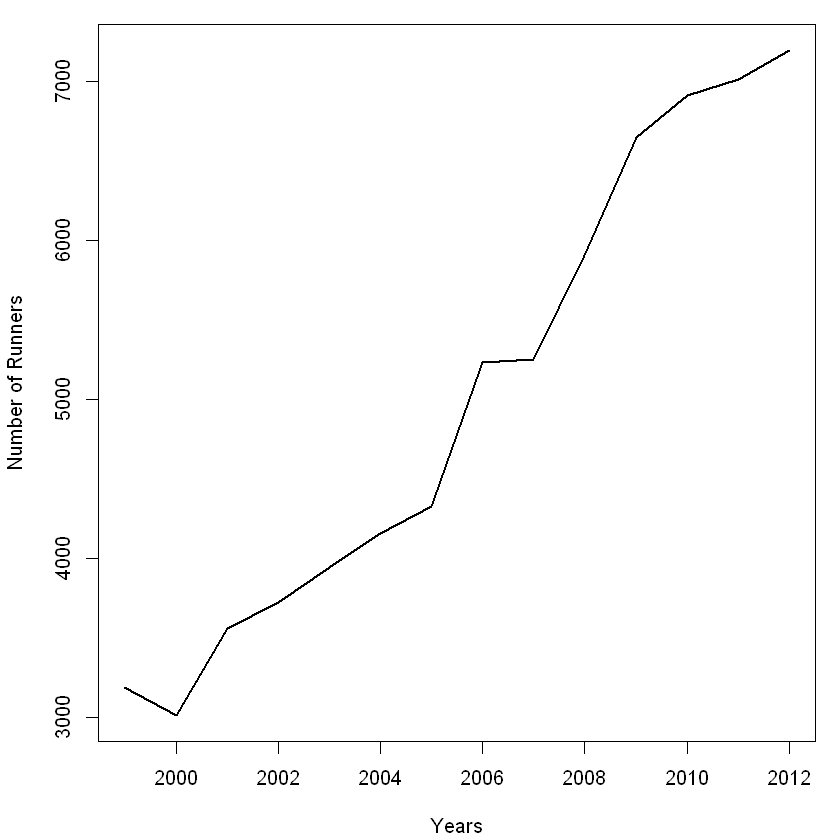

In [13]:
oldPar = par(mar = c(4.1, 4.1, 1, 1))

numRunners = with(cbMen, tapply(runTime, year, length))

plot(numRunners ~ names(numRunners), type="l", lwd = 2,
     xlab = "Years", ylab = "Number of Runners")
par(oldPar)
dev.off()

In [37]:
numRunnersDF = as.data.frame(numRunners)
names(numRunnersDF) <- "Count"
numRunnersDF$Year <- rownames(numRunnersDF)
numRunnersDF

,Count,Year
1999,3190,1999
2000,3016,2000
2001,3561,2001
2002,3723,2002
2003,3946,2003
2004,4156,2004
2005,4324,2005
2006,5235,2006
2007,5252,2007
2008,5905,2008


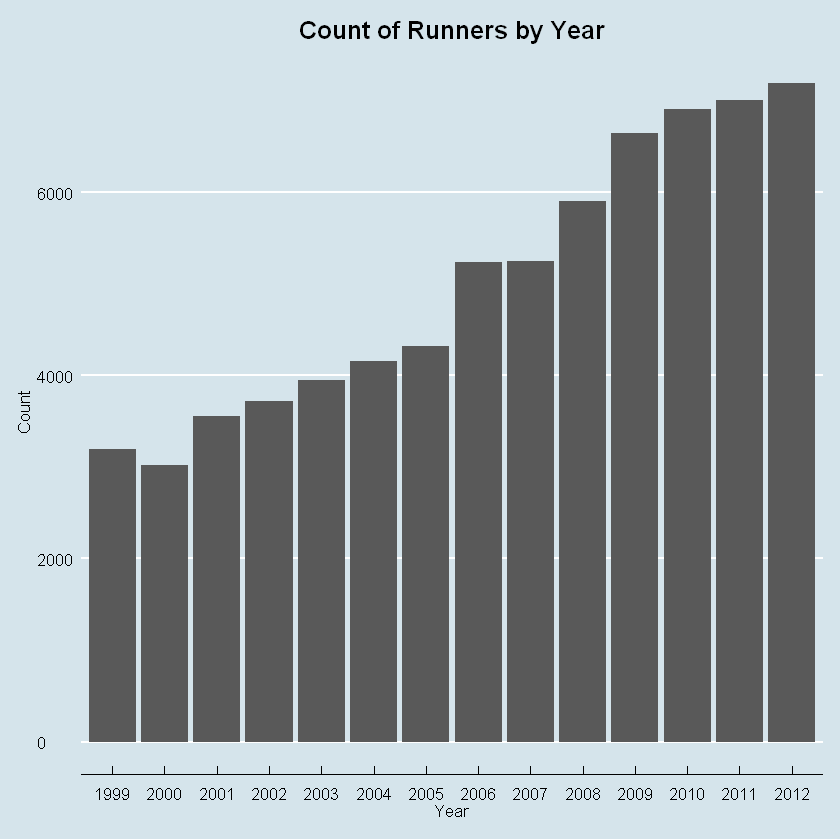

In [65]:
ggplot(numRunnersDF, aes(Year, Count)) + 
geom_col() +
ggtitle("Count of Runners by Year") +
xlab("Year") +
ylab("Count") + 
theme_economist() + 
theme(plot.title = element_text(hjust = 0.5))

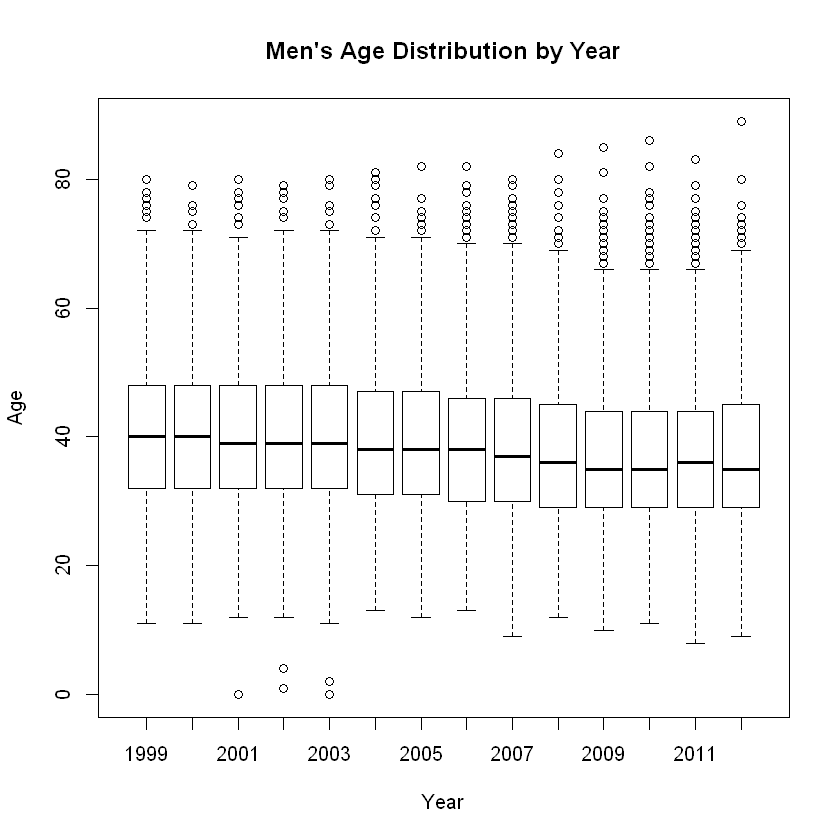

In [4]:
boxplot(cbMen$age~cbMen$year, ylab = "Age", xlab = "Year")
title("Men's Age Distribution by Year")

Warning message:
"Removed 23 rows containing non-finite values (stat_boxplot)."

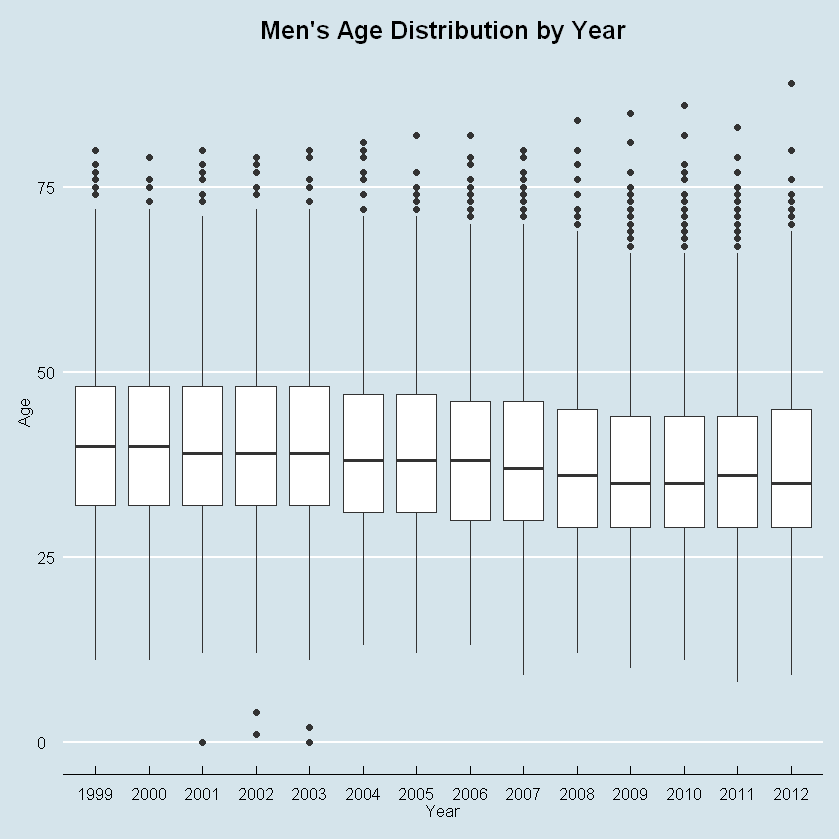

In [9]:

ggplot(cbMen, aes(x=as.factor(year), y=age)) + geom_boxplot() + 
ggtitle("Men's Age Distribution by Year") +
xlab("Year") +
ylab("Age") + 
# theme_fivethirtyeight() +
theme_economist() + 
theme(plot.title = element_text(hjust = 0.5))



## QQ Plots

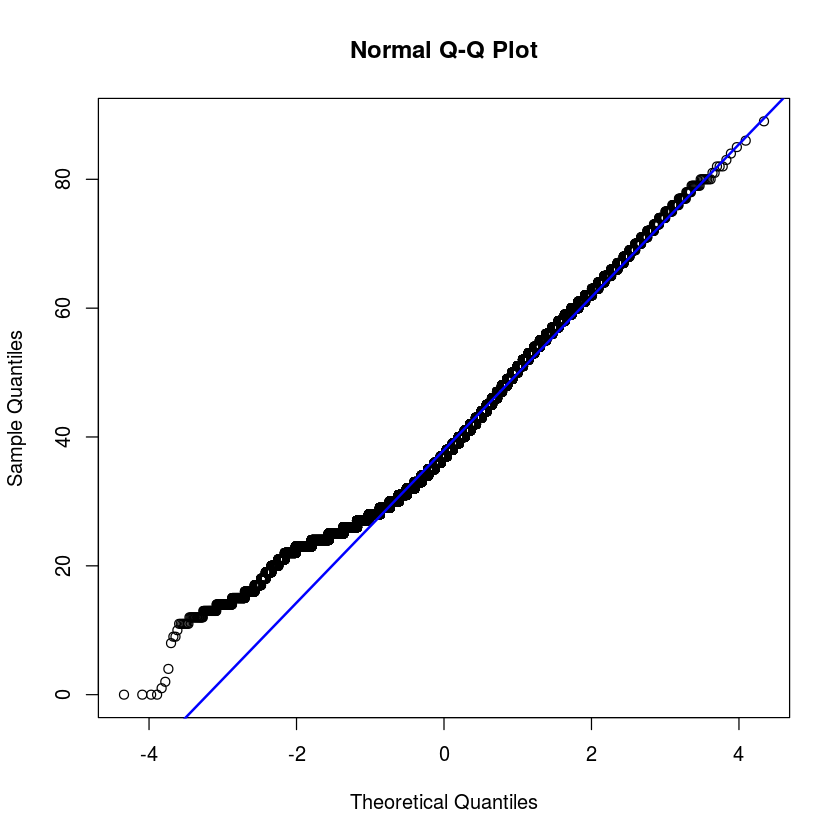

In [32]:
qqnorm(cbMen$age)
qqline(cbMen$age, col = "blue", lwd =2)

Warning message:
“Removed 23 rows containing non-finite values (stat_qq).”

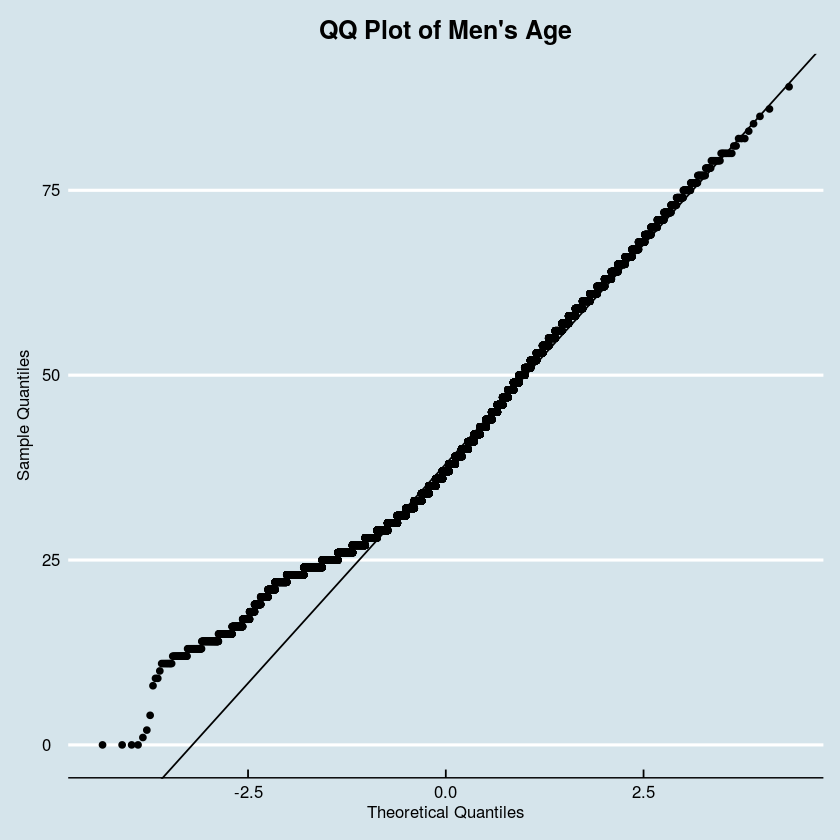

In [51]:
y = quantile(cbMen$age[!is.na(cbMen$age)], c(0.25, 0.75))
x = qnorm(c(0.25, 0.75))

slope = diff(y)/diff(x)
int = y[1L] - slope * x[1L]


p = qplot(sample=age, data=cbMen, color=year) + 
geom_abline(slope = slope, intercept = int) + 
ggtitle("QQ Plot of Men's Age") +
xlab("Theoretical Quantiles") +
ylab("Sample Quantiles") +
theme_economist() + 
theme(plot.title = element_text(hjust = 0.5))
p

Warning message:
"Removed 23 rows containing non-finite values (stat_qq)."

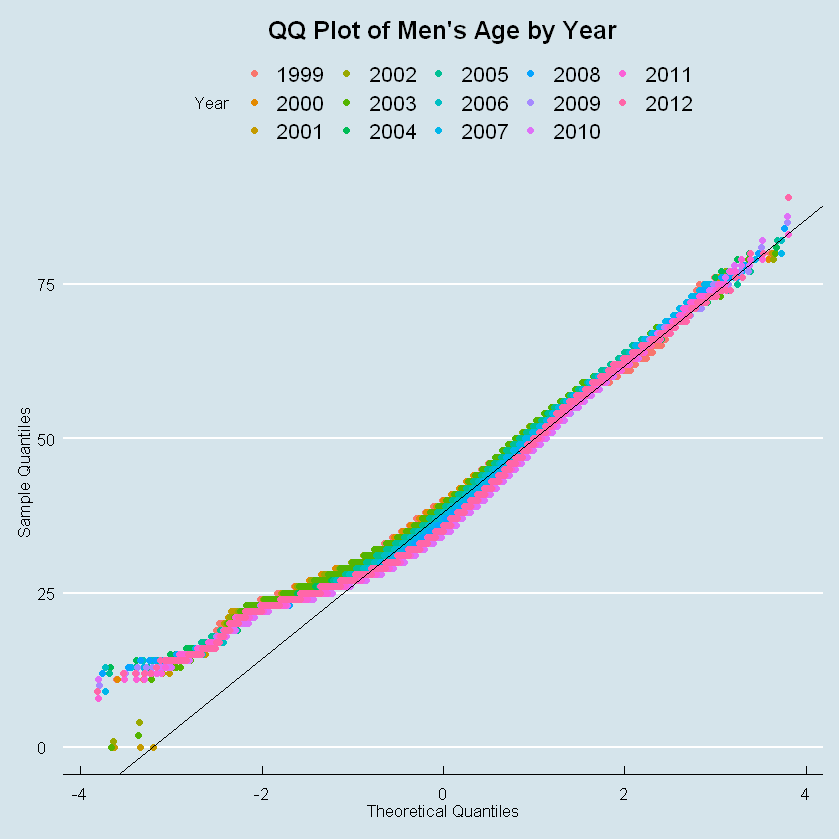

In [11]:
y = quantile(cbMen$age[!is.na(cbMen$age)], c(0.25, 0.75))
x = qnorm(c(0.25, 0.75))

slope = diff(y)/diff(x)
int = y[1L] - slope * x[1L]
Year = as.factor(cbMen$year)

p = qplot(sample=age, data=cbMen, color=Year) + 
geom_abline(slope = slope, intercept = int) + 
ggtitle("QQ Plot of Men's Age by Year") +
xlab("Theoretical Quantiles") +
ylab("Sample Quantiles") +
theme_economist() + 
theme(plot.title = element_text(hjust = 0.5))

p

Warning message:
"Removed 23 rows containing non-finite values (stat_qq)."

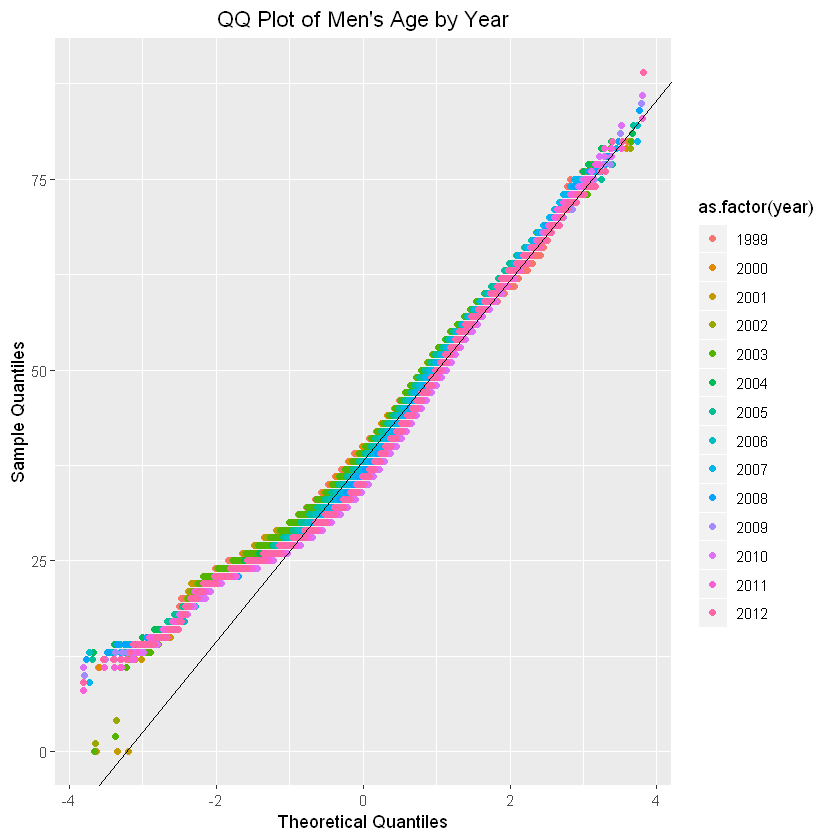

In [12]:
# Make a pretty plot
y = quantile(cbMen$age[!is.na(cbMen$age)], c(0.25, 0.75))
x = qnorm(c(0.25, 0.75))

slope = diff(y)/diff(x)
int = y[1L] - slope * x[1L]


p = qplot(sample=age, data=cbMen, color=as.factor(year)) + 
geom_abline(slope = slope, intercept = int) +
ggtitle("QQ Plot of Men's Age by Year") +
xlab("Theoretical Quantiles") +
ylab("Sample Quantiles") +
theme(plot.title = element_text(hjust = 0.5))

# theme_economist()

p

## Density Curves

Warning message:
“Removed 23 rows containing non-finite values (stat_density).”

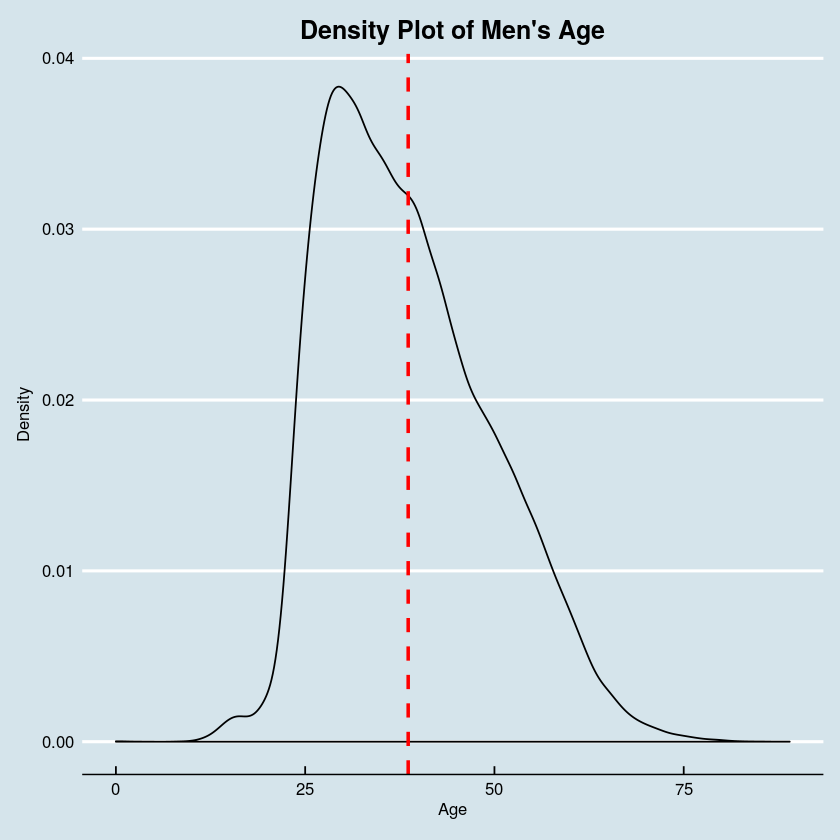

In [88]:
mean_age = mean(cbMen$age, na.rm = TRUE)

p = ggplot(cbMen, aes(x=age)) + 
geom_density() + 
geom_vline(aes(xintercept=mean_age), color="red", linetype="dashed", size=1) + 
ggtitle("Density Plot of Men's Age") + 
xlab("Age") + 
ylab("Density") + 
theme_economist() +
theme(plot.title = element_text(hjust = 0.5))

p

Warning message:
“Removed 23 rows containing non-finite values (stat_density).”

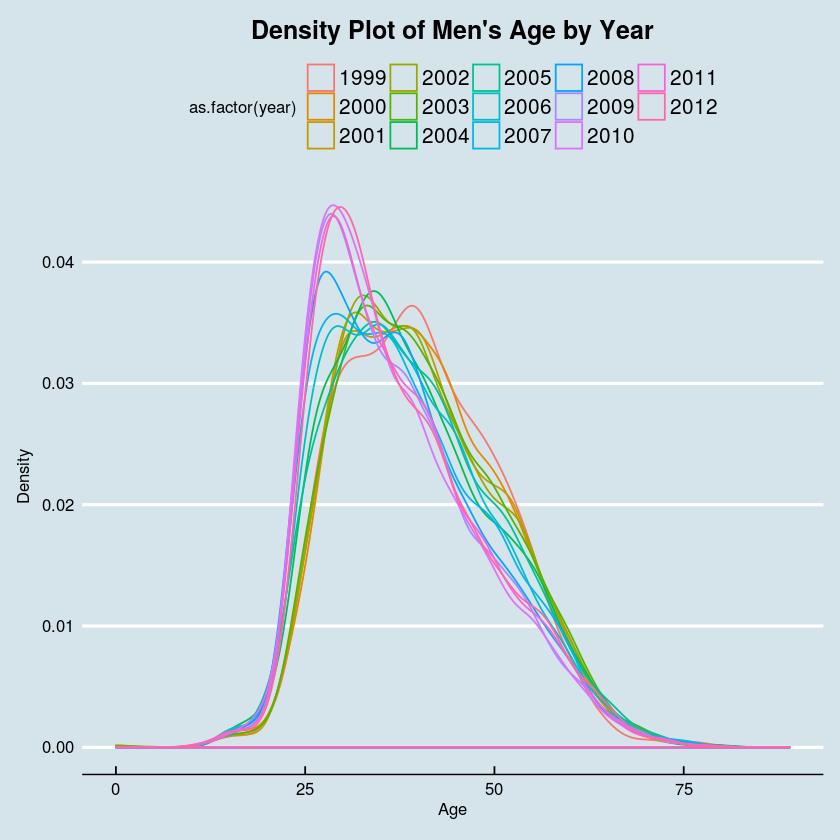

In [74]:
p = ggplot(cbMen, aes(age, color=as.factor(year))) + 
geom_density() + 
ggtitle("Density Plot of Men's Age by Year") + 
xlab("Age") + 
ylab("Density") + 
theme_economist() +
theme(plot.title = element_text(hjust = 0.5))

p

Warning message:
“Removed 23 rows containing non-finite values (stat_density).”

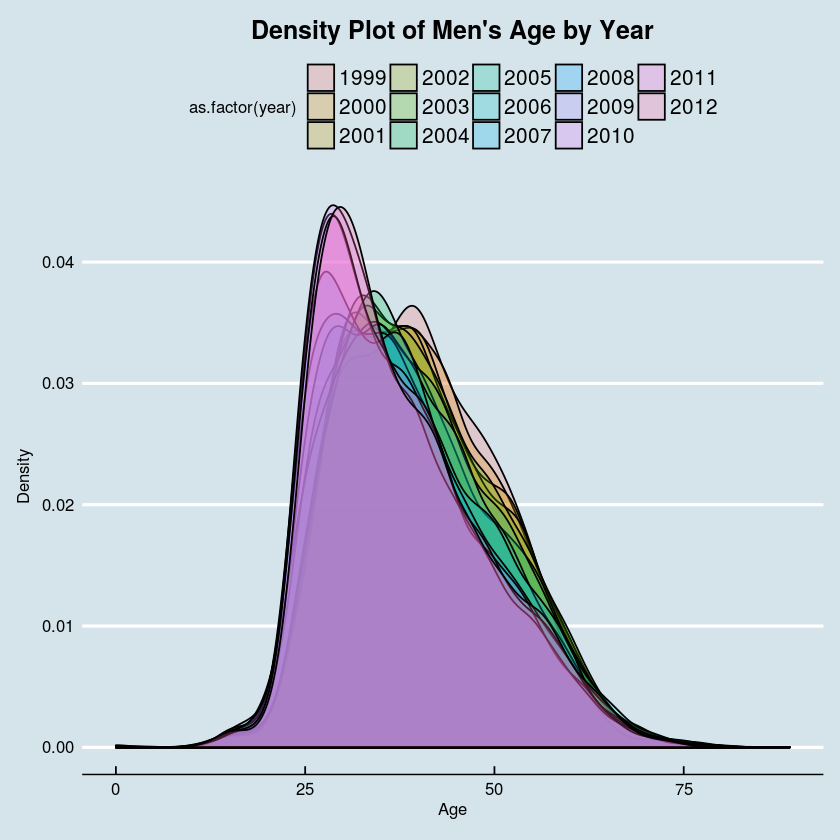

In [90]:
p = ggplot(cbMen, aes(age, fill=as.factor(year))) + 
geom_density(alpha=0.25) + 
ggtitle("Density Plot of Men's Age by Year") + 
xlab("Age") + 
ylab("Density") + 
theme_economist() +
theme(plot.title = element_text(hjust = 0.5))

p